In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'Arial Unicode MS'

## 导入数据

In [22]:
data_dir = "./hw1-data/"
df_news = pd.read_pickle(data_dir + 'df_news.pkl')
df_task = pd.read_pickle(data_dir + 'df_task.pkl')
df_user = pd.read_pickle(data_dir + 'df_user.pkl')

## 分析用户三个阶段对新闻的评分

In [61]:
def draw_three_step(kw, title):
    fig = plt.figure()
    bar_width = 0.15
    fig_data = {}

    for info in df_news.itertuples():
        if not getattr(info, 'ifclick'):
            continue
        news_index = getattr(info, 'topic')
        if news_index not in fig_data:
            fig_data[news_index] = [0 for i in range(5)]
        fig_data[news_index][int(getattr(info, kw))-1] += 1

    yi = [[] for i in range(5)]
    for indx in fig_data:
        for i in range(5):
            yi[i].append(fig_data[indx][i])

    x = np.arange(len(fig_data))
    for i in range(5):
        plt.bar(x + i * bar_width, yi[i], bar_width, label="%d" % (i+1))
    plt.title(title)
    plt.xticks(x + 0.3, list(fig_data.keys()), rotation="vertical")
    plt.xlabel("主题")
    plt.ylabel("数量")
    plt.legend(loc="best")
    plt.savefig('./img/%s_bar.png' % kw, dpi=300)
    plt.show()
    fig.close()

### 1. 阅读前评分分析

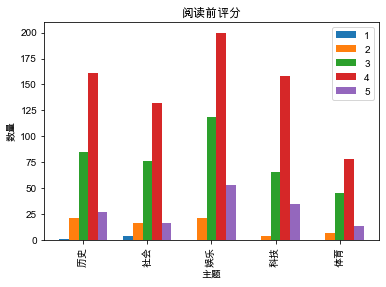

In [62]:
draw_three_step("pre_pref", "阅读前评分")

&emsp;&emsp;从本图结果来看，用户对娱乐、科技和历史类新闻相较于社会和体育类新闻有明显较高的期待值。

### 2. 阅读后评分分析

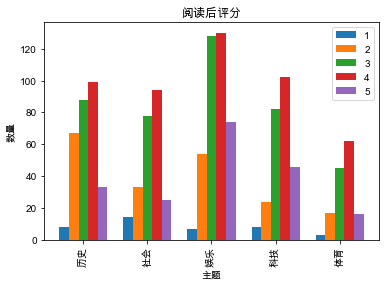

In [63]:
draw_three_step("read_pref", "阅读后评分")

&emsp;&emsp;从本图结果来看，用户在阅读新闻后，对新闻的评价普遍低于期待值；此外，阅读新闻后的用户们更倾向于给出3分或4分，部分用户在阅读后会给出高于期待值或明显低于期待值的分数。

### 3. 完成任务列表后评分分析

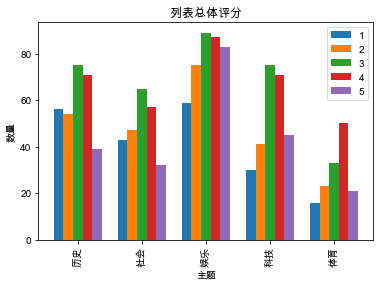

In [64]:
draw_three_step("post_pref", "列表总体评分")

&emsp;&emsp;总体来看，用户们在各个主题下给出的总体评分近似满足正太分布，用户们相较于其他类别更喜欢点击并阅读娱乐类文章，但用户们对娱乐类新闻的评价的差别较大；科技类、体育类新闻相比于其他类主题新闻的非差评数量较高。  
&emsp;&emsp;可以推测，用户们对新闻类别感兴趣的程度依次是：娱乐类、历史类、科技类、社会类、体育类；对于一组新闻列表，用户阅读后满意程度依次是：科技类、体育类、娱乐类、社会类、历史类。此外，各类新闻在总体上的评分并未达到用户的期待，用户阅读后对历史类、社会类和娱乐类新闻的评价不一，而对科技类和体育类新闻更倾向于给出好评。  
&emsp;&emsp;因此，根据用户兴趣，可以考虑增加娱乐类、科技类和历史类文章增加点击率，或增加科技类和体育类新闻来丰富新闻站的优质内容。

## 分析用户点击新闻的原因

In [71]:
def draw_whyclick():
    fig = plt.figure()
    bar_width = 0.15
    ticks = ['被标题吸引', '被图片吸引', '被话题吸引', '误点击', '以上都不是']
    fig_data = {}

    for info in df_news.itertuples():
        if not getattr(info, 'ifclick'):
            continue
        news_index = getattr(info, 'topic')
        if news_index not in fig_data:
            fig_data[news_index] = [0 for i in range(5)]
        reasons = getattr(info, "whyclick")
        for reason in reasons.split(','):
            fig_data[news_index][int(reason)-1] += 1

    yi = [[] for i in range(5)]
    for indx in fig_data:
        for i in range(5):
            yi[i].append(fig_data[indx][i])

    x = np.arange(len(fig_data))
    for i in range(5):
        plt.bar(x + i * bar_width, yi[i], bar_width, label=ticks[i])
    plt.title("点击原因分析")
    plt.xticks(x + 0.3, list(fig_data.keys()), rotation="vertical")
    plt.xlabel("主题")
    plt.ylabel("数量")
    plt.legend(loc="best")
    plt.savefig('./img/whyclick_bar.png', dpi=300)
    plt.show()
    fig.close()

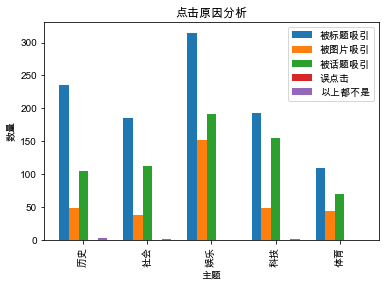

In [72]:
draw_whyclick()

&emsp;&emsp;从本图结果来看，用户更容易被新闻标题所吸引；娱乐类和体育类新闻相较于其他类新闻，用户更容易被新闻的图片吸引；科技类新闻中，用户容易被标题和主题所吸引；而历史类和社会类新闻中，用户较少被主题和图片搜吸引，更容易被标题所吸引。  
&emsp;&emsp;综上结果，在推荐娱乐类和体育类新闻时，要尽量多提供吸引人的图片；在科技类中，用户非常容易被话题所吸引，因此要注意更加清晰地标注新闻的类别，使用户更容易注意到相关类别的新闻；此外，由于用户总是对新闻的标题最感兴趣，因此，新闻的标题要注意简明扼要，抓住重点（或引人眼球）。

## 新闻质量对用户偏好影响

In [93]:
def draw_quality():
    fig = plt.figure()
    bar_width = 0.15
    ticks = ['无低质量(0)', '少低质量(3)', '中低质量(6)', '多低质量(9)']
    fig_data = {}

    for info in df_task.itertuples():
        if not getattr(info, 'click_cnt'):
            continue
        news_index = getattr(info, 'condition').strip('c')
        news_tick = ticks[int(news_index) // 3]
        if news_tick not in fig_data:
            fig_data[news_tick] = [0 for i in range(5)]
        fig_data[news_tick][int(getattr(info, "sat_zscore"))-1] += 1

    yi = [[] for i in range(5)]
    for tick in ticks:
        for i in range(5):
            yi[i].append(fig_data[tick][i])

    x = np.arange(len(fig_data))
    for i in range(5):
        plt.bar(x + i * bar_width, yi[i], bar_width, label="%d" % (i+1))
    plt.title("新闻质量与偏好分析")
    plt.xticks(x + 0.3, list(ticks))
    plt.xlabel("质量")
    plt.ylabel("数量")
    plt.legend(loc="best")
    plt.savefig('./img/quality_bar.png', dpi=300)
    plt.show()
    plt.close()

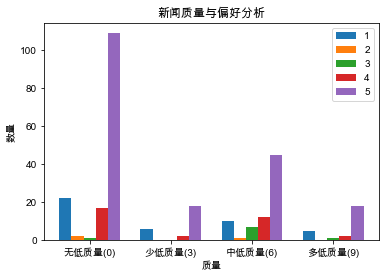

In [94]:
draw_quality()

&emsp;&emsp;从本图来看，用户对低质量新闻条数的敏感程度没有明显的差异，考虑到新闻站的内容丰富性，可以考虑插入较多（6条）低质量的新闻而获取较高收益；亦或者追求新闻站的优质性，不插入低质量新闻以获取最高的用户满意度。

In [ ]:
## 系统构建结论
1. 根据用户兴趣，可以考虑增加娱乐类、科技类和历史类文章增加点击率，或增加科技类和体育类新闻来丰富新闻站的优质内容。  
2. 在推荐娱乐类和体育类新闻时，要尽量多提供吸引人的图片；在科技类中，用户非常容易被话题所吸引，因此要注意更加清晰地标注新闻的类别，使用户更容易注意到相关类别的新闻；此外，由于用户总是对新闻的标题最感兴趣，因此，新闻的标题要注意简明扼要，抓住重点（或引人眼球）。  
3. 考虑到新闻站的内容丰富性，可以考虑插入较多（6条）低质量的新闻而获取较高收益；亦或者追求新闻站的优质性，不插入低质量新闻以获取最高的用户满意度。